# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/')

# Import Packages

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from numpy.random import seed
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow
import pandas as pd

%matplotlib inline
from glob import glob

In [ ]:
# Print Graphs (training vs testing)
def plotting(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.ylabel(string)
    plt.xlabel("Epochs")
    plt.legend([string, "val_"+string])
    plt.show()

In [ ]:
model = ResNet50(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')
for layer in model.layers:
    layer.trainable = False
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

# Varying Length

## Small sample size: model run (5%) 80% test, 73% train

In [ ]:
train_data_dir = "/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/unique_5_sample_train"
test_data_dir = "/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/unique_5_sample_test"

In [ ]:
path = train_data_dir
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [ ]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)

train_datagen = ImageDataGenerator(
      rescale = 1./255)

train_generator =train_datagen.flow_from_directory(
     train_data_dir,
     batch_size= 8,
     seed=42,
     shuffle=True, 
     target_size = (224,224))

test_datagen = ImageDataGenerator(
    rescale = 1./255)

test_generator =test_datagen.flow_from_directory(
     test_data_dir,
     batch_size= 1,
     seed=42,
     shuffle=False, 
     target_size = (224,224)) 

Found 300 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [ ]:
num_pneumonia = len(os.listdir(os.path.join(train_data_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_data_dir, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_data_dir, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
x = Flatten()(model.output)
# x = tf.keras.layers.Dropout(rate=0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model1 = Model(inputs=model.input, outputs=output)

In [ ]:
model1.compile(optimizer ="adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8)
mc = ModelCheckpoint("resnet_samplesize_model1.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

In [ ]:
history1 = model1.fit(train_generator,
                      validation_data=test_generator,
                      callbacks=[mc,es],
                      class_weight = class_weight,
                      epochs=20,
                      verbose=1)

Epoch 1/20
38/38 [==============================] - 171s 4s/step - loss: 1.4131 - accuracy: 0.5000 - val_loss: 1.2302 - val_accuracy: 0.6774

Epoch 00001: val_loss improved from inf to 1.23023, saving model to resnet_samplesize_model1.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
38/38 [==============================] - 11s 299ms/step - loss: 0.3670 - accuracy: 0.5933 - val_loss: 0.9259 - val_accuracy: 0.6774

Epoch 00002: val_loss improved from 1.23023 to 0.92585, saving model to resnet_samplesize_model1.h5
Epoch 3/20
38/38 [==============================] - 12s 312ms/step - loss: 0.4152 - accuracy: 0.5800 - val_loss: 1.8688 - val_accuracy: 0.1774

Epoch 00003: val_loss did not improve from 0.92585
Epoch 4/20
38/38 [==============================] - 12s 303ms/step - loss: 0.2844 - accuracy: 0.6433 - val_loss: 1.1445 - val_accuracy: 0.6774

Epoch 00004: val_loss did not improve from 0.92585
Epoch 5/20
38/38 [==============================] - 11s 298ms/step - loss: 0.2536 - accuracy: 0.6367 - val_loss: 0.6017 - val_accuracy: 0.6774

Epoch 00005: val_loss improved from 0.92585 to 0.60166, saving model to resnet_samplesize_model1.h5
Epoch 6/20
38/38 [==============================] - 12s 308ms/step - loss: 0.1898 - accuracy: 0.7100 - val_loss: 0.5972 - 

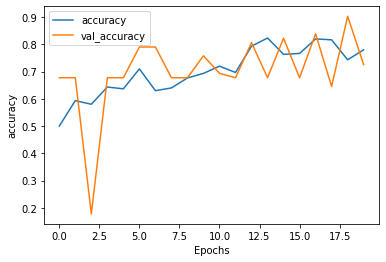

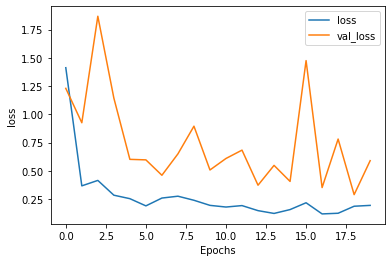

In [ ]:
plotting(history1, "accuracy")
plotting(history1, "loss")

In [ ]:
# Get Accuracy Rate of Model (training and testing)
evaluation = model1.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model1.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

62/62 [==============================] - 3s 44ms/step - loss: 0.5899 - accuracy: 0.7258
Test Accuracy: 72.58%
38/38 [==============================] - 9s 222ms/step - loss: 0.6208 - accuracy: 0.7133
Train Accuracy: 71.33%


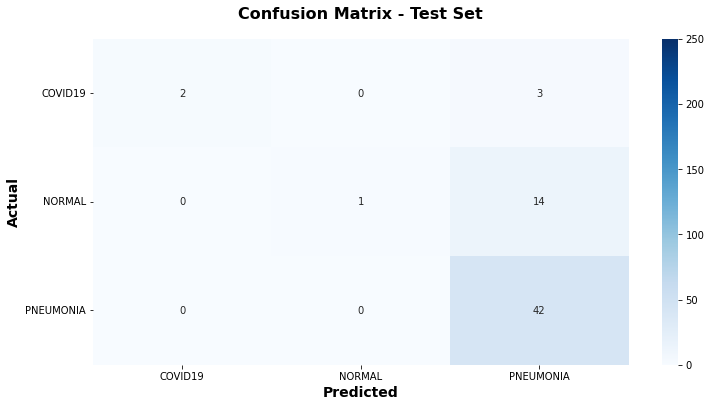

In [ ]:
# Print Confusion Matrix

classes = ['COVID19', 'NORMAL', 'PNEUMONIA']

pred_class = model1.predict(test_generator)
predictions = np.array(list(map(lambda x: np.argmax(x), pred_class)))

y_true= test_generator.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

## Model run 2

## Small sample size: model run (20%) 79% test, 73% train

In [ ]:
train_data_dir = "/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/unique_20_sample_train"
test_data_dir = "/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/unique_20_sample_test"


In [ ]:
path = train_data_dir
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [ ]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)

train_datagen = ImageDataGenerator(
      rescale = 1./255)

train_generator =train_datagen.flow_from_directory(
     train_data_dir,
     batch_size= 8,
     seed=42,
     shuffle=True, 
     target_size = (224,224))

test_datagen = ImageDataGenerator(
    rescale = 1./255)

test_generator =test_datagen.flow_from_directory(
     test_data_dir,
     batch_size= 1,
     seed=42,
     shuffle=False, 
     target_size = (224,224)) 

Found 1205 images belonging to 3 classes.
Found 257 images belonging to 3 classes.


In [ ]:
num_pneumonia = len(os.listdir(os.path.join(train_data_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_data_dir, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_data_dir, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
x = Flatten()(model.output)
# x = tf.keras.layers.Dropout(rate=0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model2 = Model(inputs=model.input, outputs=output)

In [ ]:
model2.compile(optimizer ="adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8)
mc = ModelCheckpoint("resnet_samplesize_model2.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

In [ ]:
history2 = model2.fit(train_generator,
                      validation_data=test_generator,
                      callbacks=[mc,es],
                      class_weight = class_weight,
                      epochs=20,
                      verbose=1)

Epoch 1/20
151/151 [==============================] - 353s 2s/step - loss: 0.5371 - accuracy: 0.5726 - val_loss: 0.7478 - val_accuracy: 0.7043

Epoch 00001: val_loss improved from inf to 0.74783, saving model to resnet_model2_samplesize.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
151/151 [==============================] - 48s 320ms/step - loss: 0.2201 - accuracy: 0.7245 - val_loss: 0.5749 - val_accuracy: 0.7704

Epoch 00002: val_loss improved from 0.74783 to 0.57488, saving model to resnet_model2_samplesize.h5
Epoch 3/20
151/151 [==============================] - 49s 322ms/step - loss: 0.1751 - accuracy: 0.7560 - val_loss: 0.6574 - val_accuracy: 0.7160

Epoch 00003: val_loss did not improve from 0.57488
Epoch 4/20
151/151 [==============================] - 48s 317ms/step - loss: 0.1841 - accuracy: 0.7519 - val_loss: 0.8269 - val_accuracy: 0.7160

Epoch 00004: val_loss did not improve from 0.57488
Epoch 5/20
151/151 [==============================] - 49s 322ms/step - loss: 0.1501 - accuracy: 0.7892 - val_loss: 0.4909 - val_accuracy: 0.8171

Epoch 00005: val_loss improved from 0.57488 to 0.49093, saving model to resnet_model2_samplesize.h5
Epoch 6/20
151/151 [==============================] - 48s 318ms/step - loss: 0.1918 - accuracy: 0.7353 - val_loss:

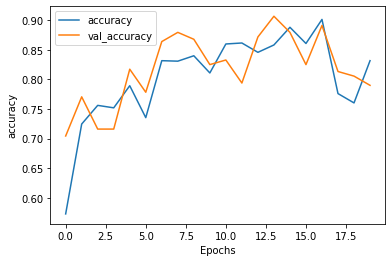

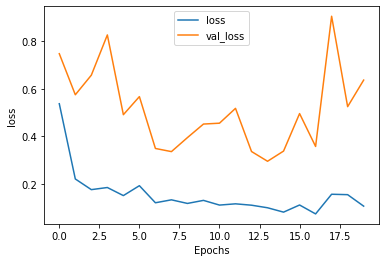

In [ ]:
plotting(history2, "accuracy")
plotting(history2, "loss")

In [ ]:
# Get Accuracy Rate of Model (training and testing)
evaluation = model2.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

257/257 [==============================] - 12s 45ms/step - loss: 0.6367 - accuracy: 0.7899
Test Accuracy: 78.99%
151/151 [==============================] - 37s 244ms/step - loss: 0.6604 - accuracy: 0.7328
Train Accuracy: 73.28%


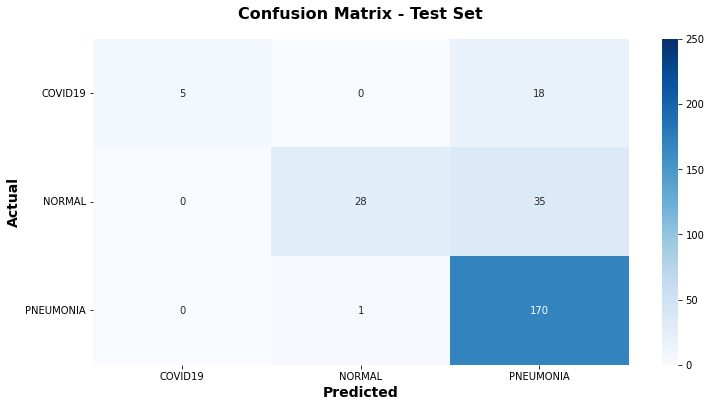

In [ ]:
# Print Confusion Matrix

classes = ['COVID19', 'NORMAL', 'PNEUMONIA']

pred_class = model2.predict(test_generator)
predictions = np.array(list(map(lambda x: np.argmax(x), pred_class)))

y_true= test_generator.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

## Model run 3


## Small sample size: model run (60%) 92.75% test, 92.9% train

In [ ]:
train_data_dir = "/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/unique_60_sample_train"
test_data_dir = "/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/unique_60_sample_test"


In [ ]:
path = train_data_dir
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [ ]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)

train_datagen = ImageDataGenerator(
      rescale = 1./255)

train_generator =train_datagen.flow_from_directory(
     train_data_dir,
     batch_size= 8,
     seed=42,
     shuffle=True, 
     target_size = (224,224))

test_datagen = ImageDataGenerator(
    rescale = 1./255)

test_generator =test_datagen.flow_from_directory(
     test_data_dir,
     batch_size= 1,
     seed=42,
     shuffle=False, 
     target_size = (224,224)) 

Found 3618 images belonging to 3 classes.
Found 772 images belonging to 3 classes.


In [ ]:
num_pneumonia = len(os.listdir(os.path.join(train_data_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_data_dir, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_data_dir, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
x = Flatten()(model.output)
# x = tf.keras.layers.Dropout(rate=0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model3 = Model(inputs=model.input, outputs=output)

In [ ]:
model3.compile(optimizer ="adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8)
mc = ModelCheckpoint("resnet_samplesize_model3.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

# seed(1)
# tensorflow.random.set_seed(2)

In [ ]:
history3 = model3.fit(train_generator,
                      validation_data=test_generator,
                      callbacks=[mc,es],
                      class_weight = class_weight,
                      epochs=20,
                      verbose=1)

Epoch 1/20
453/453 [==============================] - 1246s 3s/step - loss: 0.4003 - accuracy: 0.6299 - val_loss: 0.6299 - val_accuracy: 0.7435

Epoch 00001: val_loss improved from inf to 0.62986, saving model to resnet_samplesize_model3.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
453/453 [==============================] - 863s 2s/step - loss: 0.1435 - accuracy: 0.7919 - val_loss: 0.5691 - val_accuracy: 0.7953

Epoch 00002: val_loss improved from 0.62986 to 0.56907, saving model to resnet_samplesize_model3.h5
Epoch 3/20
453/453 [==============================] - 849s 2s/step - loss: 0.1434 - accuracy: 0.7913 - val_loss: 0.9266 - val_accuracy: 0.6982

Epoch 00003: val_loss did not improve from 0.56907
Epoch 4/20
453/453 [==============================] - 853s 2s/step - loss: 0.1699 - accuracy: 0.7371 - val_loss: 0.4710 - val_accuracy: 0.7953

Epoch 00004: val_loss improved from 0.56907 to 0.47100, saving model to resnet_samplesize_model3.h5
Epoch 5/20
453/453 [==============================] - 845s 2s/step - loss: 0.1478 - accuracy: 0.7886 - val_loss: 0.3836 - val_accuracy: 0.8847

Epoch 00005: val_loss improved from 0.47100 to 0.38358, saving model to resnet_samplesize_model3.h5
Epoch 6/20
453/453 [==============================] - 849s 2s/step - loss

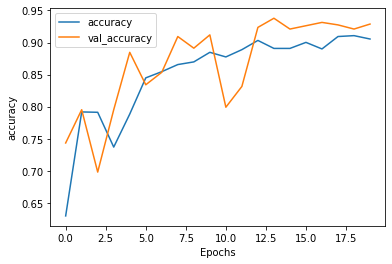

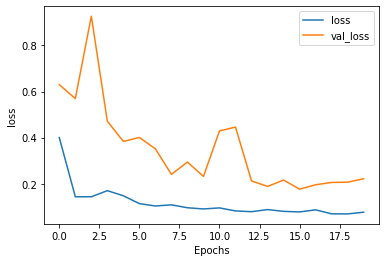

In [ ]:
plotting(history3, "accuracy")
plotting(history3, "loss")

In [ ]:
# Get Accuracy Rate of Model (training and testing)
evaluation = model3.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model3.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

772/772 [==============================] - 189s 245ms/step - loss: 0.2217 - accuracy: 0.9288
Test Accuracy: 92.88%
453/453 [==============================] - 668s 1s/step - loss: 0.2172 - accuracy: 0.9345
Train Accuracy: 93.45%


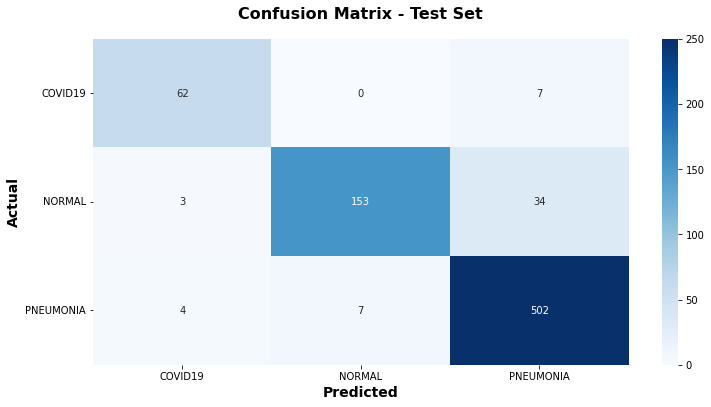

In [ ]:
# Print Confusion Matrix

classes = ['COVID19', 'NORMAL', 'PNEUMONIA']

pred_class = model3.predict(test_generator)
predictions = np.array(list(map(lambda x: np.argmax(x), pred_class)))

y_true= test_generator.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

(224, 224, 3)

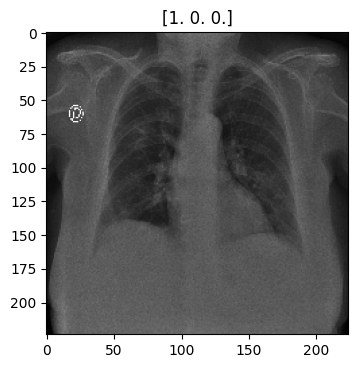

In [ ]:
test_img = test_generator.__getitem__(1)
preview_imgs, preview_labels = test_img
plt.title(str(preview_labels[0]))
plt.imshow(preview_imgs[0])

img = preview_imgs[0]
img.shape

In [ ]:
os.chdir('/content/drive/MyDrive/BT4221 Project/Processing   Model /Data/vizgradcam')

/content/drive/.shortcut-targets-by-id/1tBdSji21KgPglmR793LZtaDQOEIckCP4/BT4221 Project/Processing   Model /Data/vizgradcam/gradcam.py:77: RuntimeWarning: invalid value encountered in true_divide
  activation_map.max() - activation_map.min()


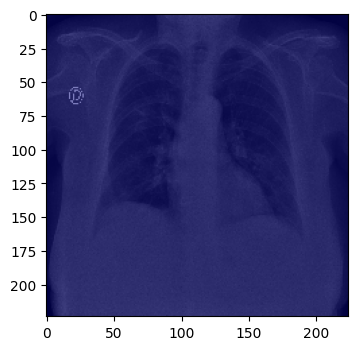

In [ ]:
from gradcam import VizGradCAM

VizGradCAM(
    model3,   #load model   (this is your model)
    img
)

In [ ]:
len(test_generator)

772

/content/drive/.shortcut-targets-by-id/1tBdSji21KgPglmR793LZtaDQOEIckCP4/BT4221 Project/Processing   Model /Data/vizgradcam/gradcam.py:77: RuntimeWarning: invalid value encountered in true_divide
  activation_map.max() - activation_map.min()


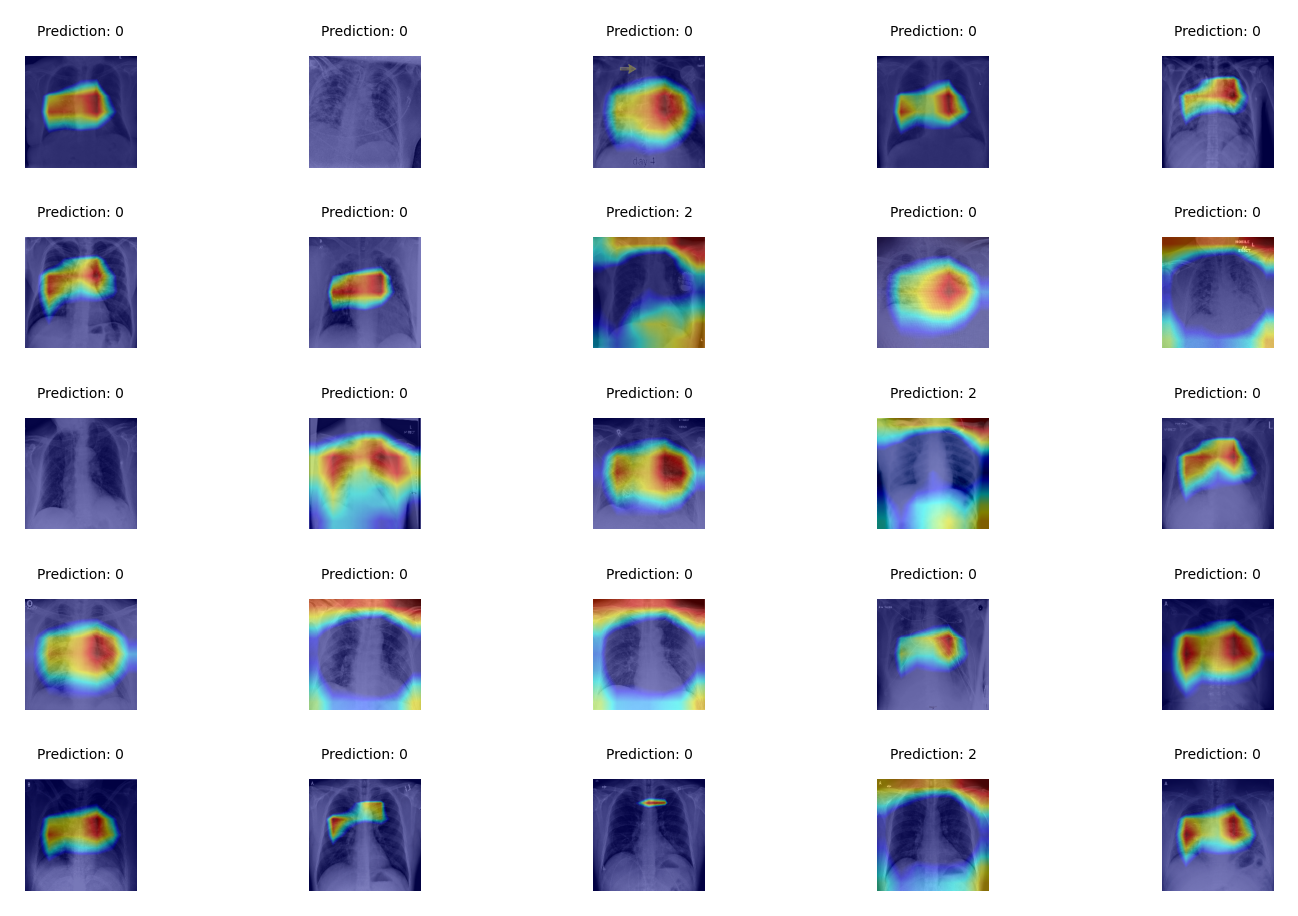

In [ ]:
for i in range(25):
  # define subplot
  plt.rcParams["figure.dpi"] = 250
  plt.subplot(5,5, i+1)
  plt.tight_layout()
  img = test_generator.__getitem__(i+25)
  preview_img, preview_labels = img
  pred = model3.predict(preview_img[0].reshape(1, 224, 224, 3))
  plt.title("Prediction: " + str(pred.argmax()),fontsize = 4)
  plt.axis('off')
  VizGradCAM(model3, preview_img[0])

In [ ]:
new_model = tf.keras.models.load_model('resnet_samplesize_model3.h5')


In [ ]:
evaluation = new_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = new_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

772/772 [==============================] - 182s 235ms/step - loss: 0.1765 - accuracy: 0.9262
Test Accuracy: 92.62%
453/453 [==============================] - 659s 1s/step - loss: 0.1556 - accuracy: 0.9450
Train Accuracy: 94.50%


In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)